In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [146]:
# Load Dataset
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/car_price.csv"
df = pd.read_csv(url)

current_year = datetime.now().year
df['Age'] = current_year - df['Year']

In [147]:
# Encode all non-numerical data
encoder = LabelEncoder()
df['Encoded Brand'] = encoder.fit_transform(df['Brand'])
df['Encoded Body'] = encoder.fit_transform(df['Body'])
df['Encoded Engine Type'] = encoder.fit_transform(df['Engine Type'])
df['Encoded Registration'] = encoder.fit_transform(df['Registration'])
df['Encoded Model'] = encoder.fit_transform(df['Model'])

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Age,Encoded Brand,Encoded Body,Encoded Engine Type,Encoded Registration,Encoded Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,32,1,3,3,1,18
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,24,2,5,0,1,266
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,20,2,3,1,1,237
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,16,0,0,3,1,224
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,12,5,0,3,1,227


In [148]:
# Find null and zero data
missing_values = df.isnull().sum()
print()
print("Missing Values:")
print(missing_values)

# Fill null and zero data with median
df['Price'].fillna(df['Price'].median(), inplace=True)
df['EngineV'].fillna(df['EngineV'].median(), inplace=True)

# Recheck for missing data
missing_values = df.isnull().sum()
print()
print("Missing Values:")
print(missing_values)


Missing Values:
Brand                     0
Price                   172
Body                      0
Mileage                   0
EngineV                 150
Engine Type               0
Registration              0
Year                      0
Model                     0
Age                       0
Encoded Brand             0
Encoded Body              0
Encoded Engine Type       0
Encoded Registration      0
Encoded Model             0
dtype: int64

Missing Values:
Brand                   0
Price                   0
Body                    0
Mileage                 0
EngineV                 0
Engine Type             0
Registration            0
Year                    0
Model                   0
Age                     0
Encoded Brand           0
Encoded Body            0
Encoded Engine Type     0
Encoded Registration    0
Encoded Model           0
dtype: int64


In [149]:
# Display the Univariate Data Characteristics 
df.describe()

,Price,Mileage,EngineV,Year,Age,Encoded Brand,Encoded Body,Encoded Engine Type,Encoded Registration,Encoded Model
count,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000
mean,19105.277551,161.237284,2.770341,2006.550058,16.449942,3.156272,2.550288,1.288377,0.908400,165.751669
std,25120.133334,105.705797,4.979364,6.719097,6.719097,2.078174,1.655482,1.361100,0.288493,88.443642
min,600.000000,0.000000,0.600000,1969.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7100.000000,86.000000,1.900000,2003.000000,11.000000,1.000000,1.000000,0.000000,1.000000,105.000000
50%,11500.000000,155.000000,2.200000,2008.000000,15.000000,3.000000,3.000000,1.000000,1.000000,164.000000
75%,20900.000000,230.000000,3.000000,2012.000000,20.000000,5.000000,3.000000,3.000000,1.000000,227.000000
max,300000.000000,980.000000,99.990000,2016.000000,54.000000,6.000000,5.000000,3.000000,1.000000,311.000000


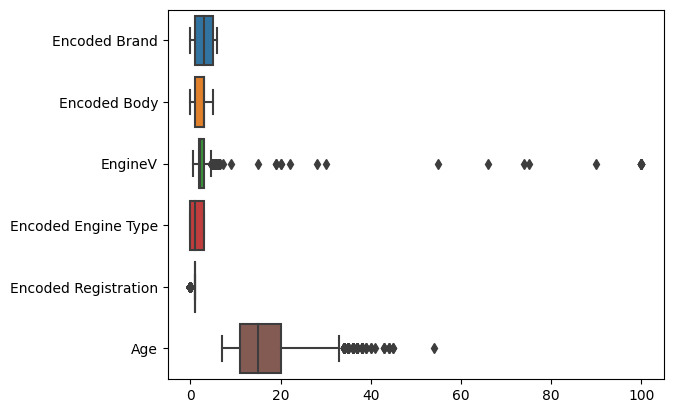

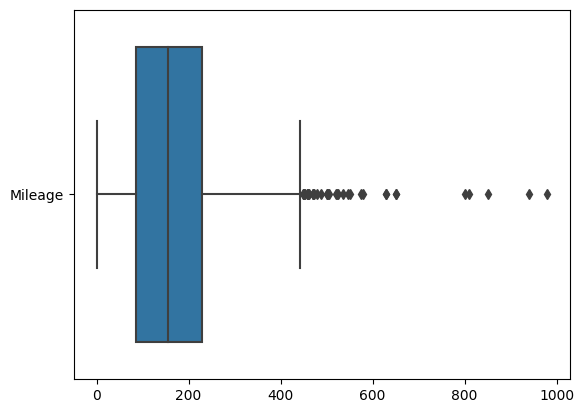

In [150]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=df[['Encoded Brand', 'Encoded Body', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']], orient='h')
plt.show()

sns.boxplot(data=df[['Mileage']], orient = 'h')
plt.show()

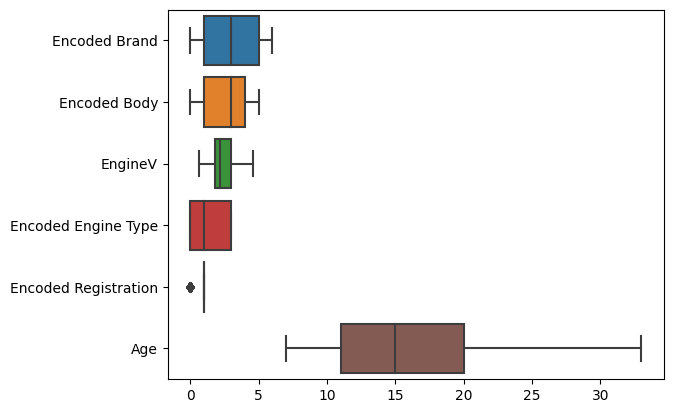

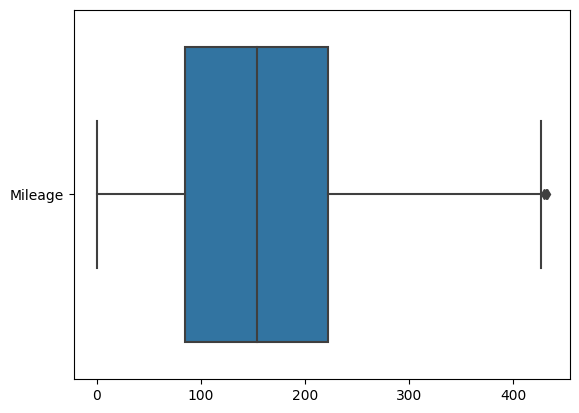

In [151]:
# Redisplay Graphical Univariate EDA using box plot to analyze data distribution after removing outliers
# Remove outliers in EngineV
for x in ["EngineV"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
# Remove outliers in Age
for x in ["Age"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
# Remove outliers in Mileage
for x in ["Mileage"]:
 Q3, Q1 = np.percentile(df.loc[:,x],[75, 25])
 IQR = Q3 - Q1
 
 upper_limit = Q3 + (1.5 * IQR)
 lower_limit = Q1 - (1.5 * IQR)
 
 df = df.drop(df[(df[x] > upper_limit) | (df[x] < lower_limit)].index)
 
sns.boxplot(data=df[['Encoded Brand', 'Encoded Body', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']], orient='h')
plt.show()

sns.boxplot(data=df[['Mileage']], orient = 'h')
plt.show()

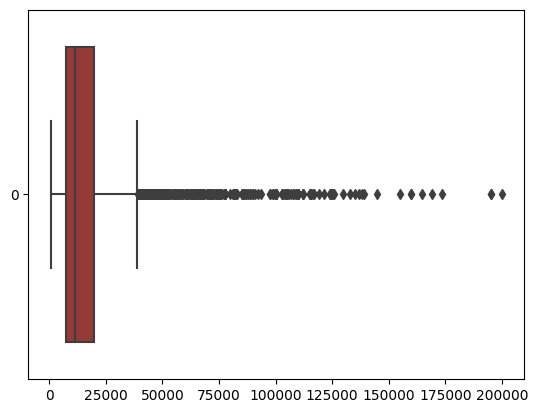

In [152]:
# Display data distribution of Price
sns.boxplot(data=df['Price'], orient='h', color='brown')
plt.show()

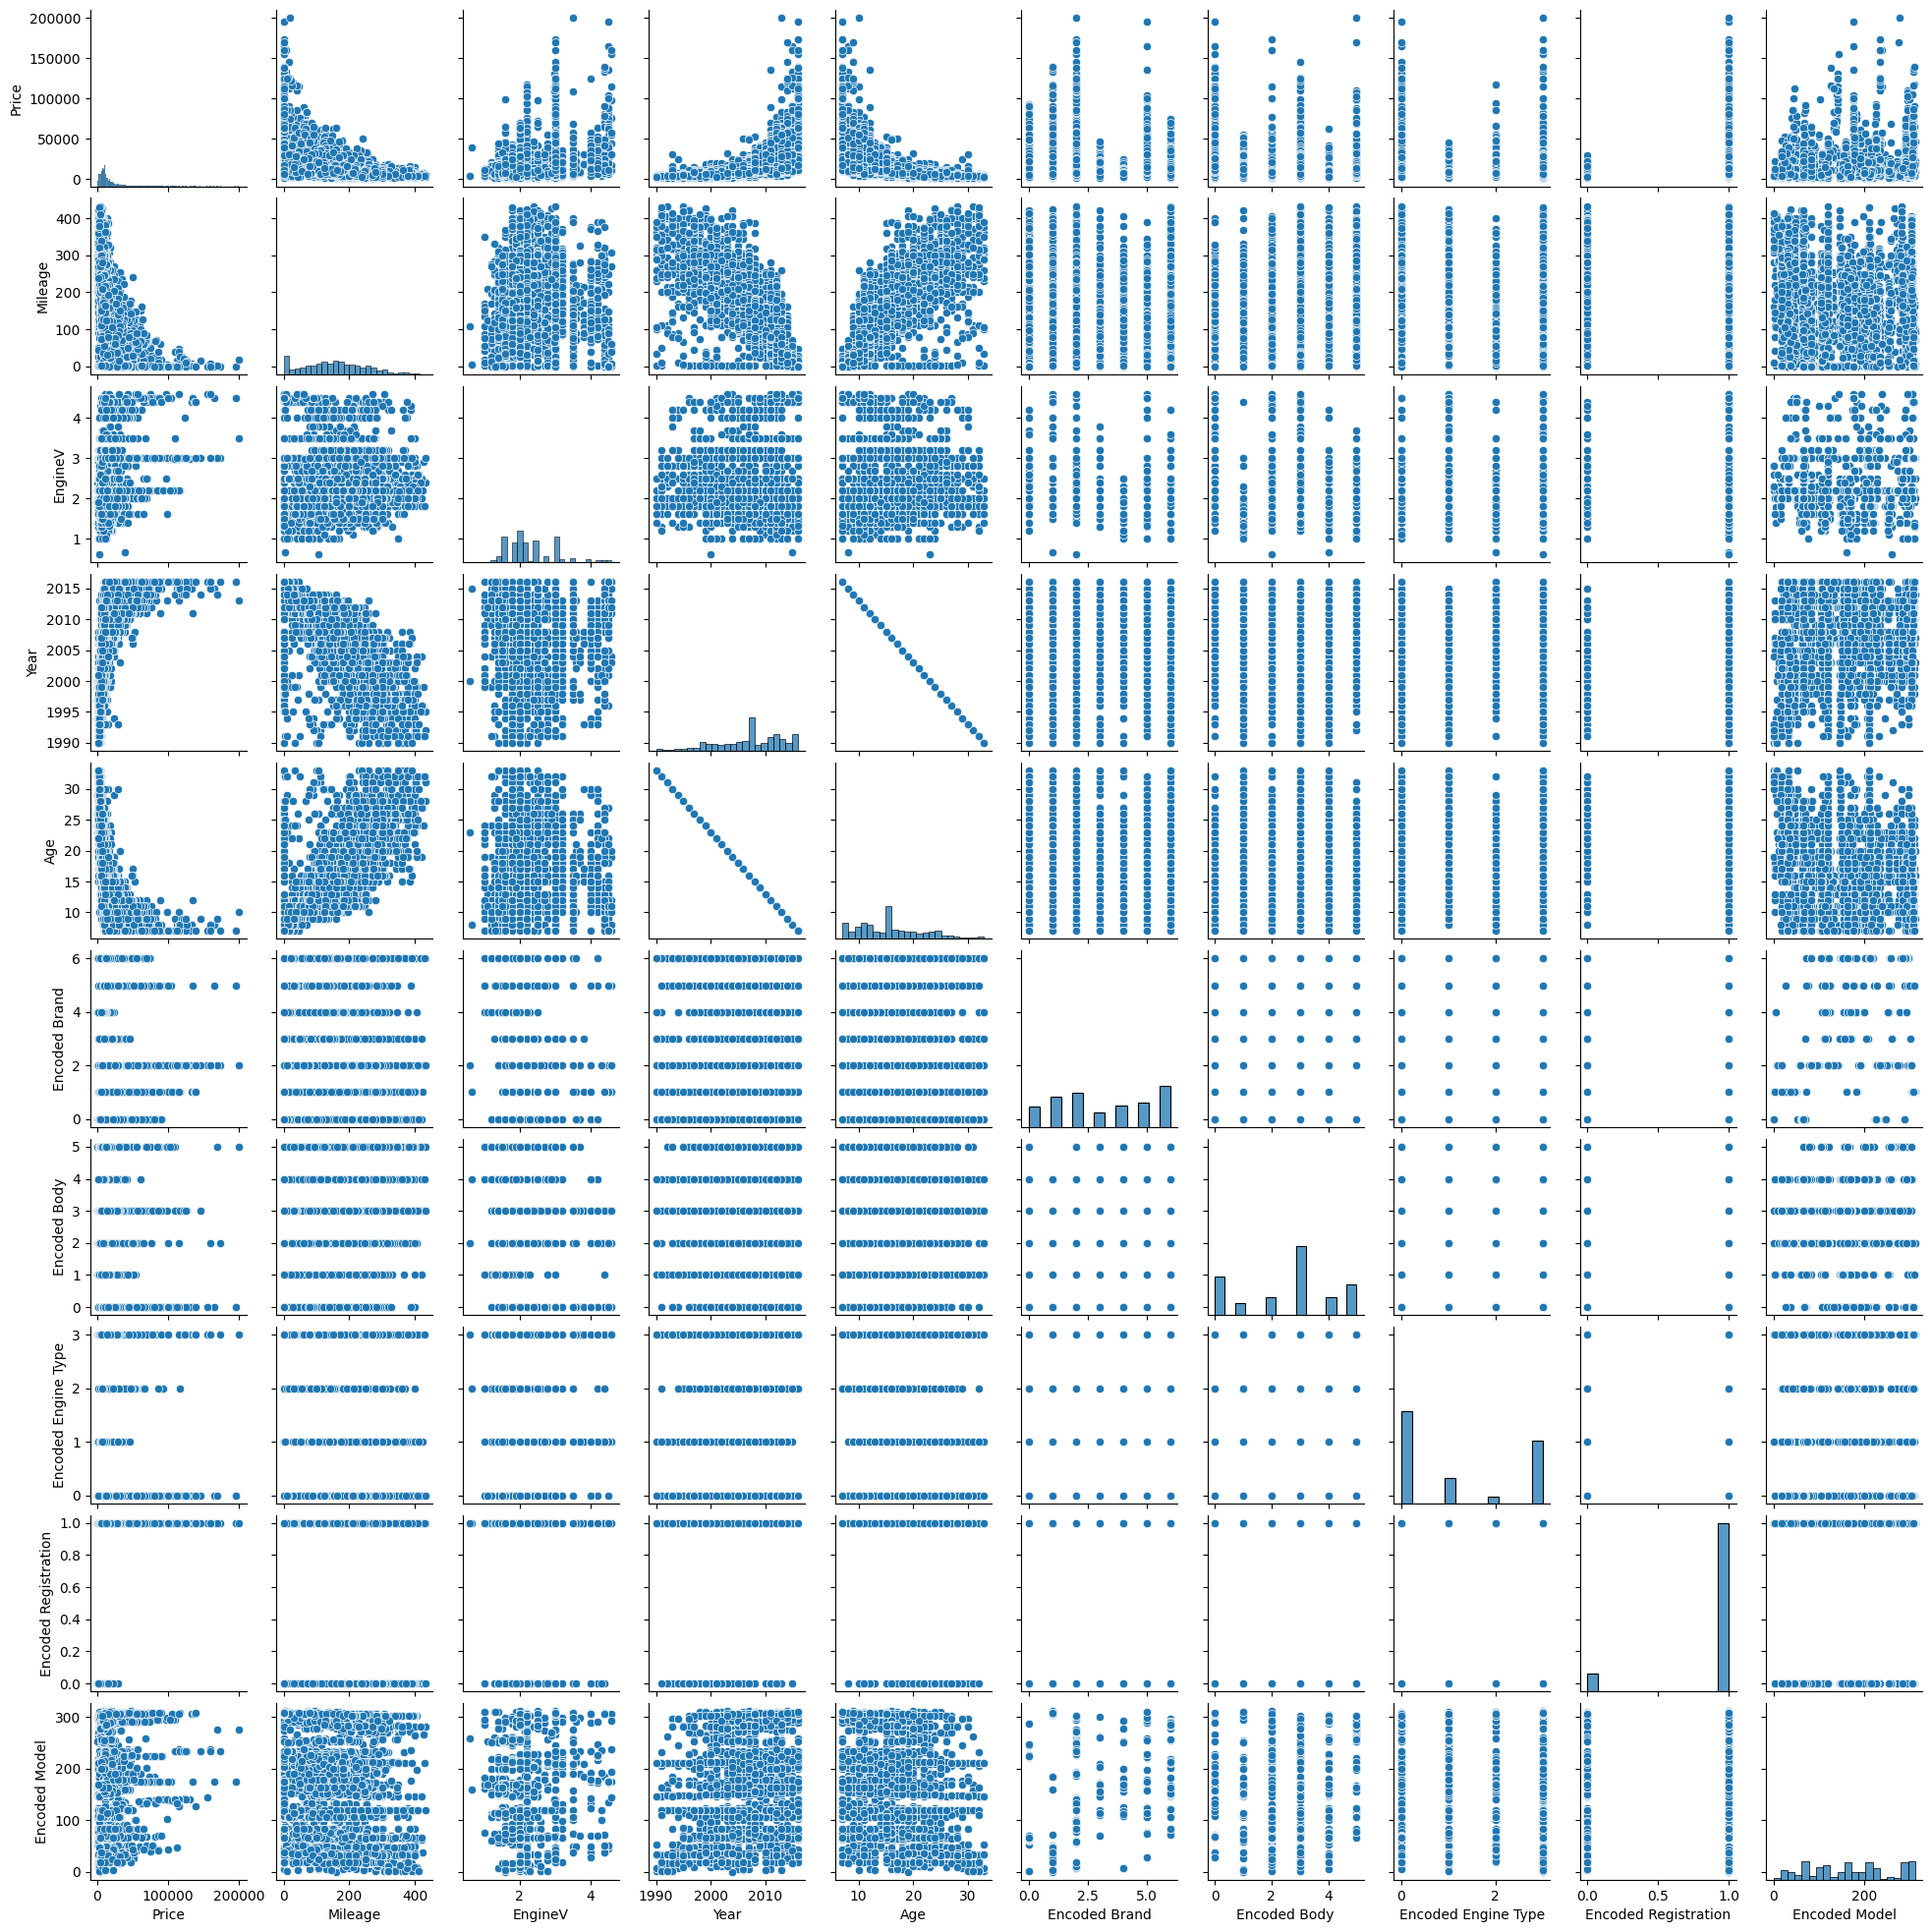

In [153]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=df, height=2)
plt.show()

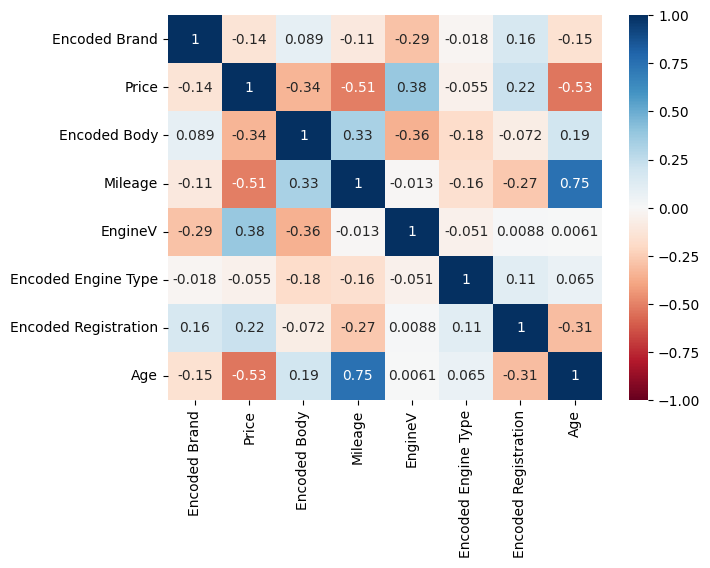

In [154]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(7,5))
sns.heatmap(df[['Encoded Brand', 'Price', 'Encoded Body', 'Mileage', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']].corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [155]:
# Get x and y values
X = df[['Encoded Brand', 'Encoded Body', 'Mileage', 'EngineV', 'Encoded Engine Type', 'Encoded Registration', 'Age']]
Y = df['Price']

X.head()

,Encoded Brand,Encoded Body,Mileage,EngineV,Encoded Engine Type,Encoded Registration,Age
0,1,3,277,2.0,3,1,32
1,2,5,427,2.9,0,1,24
3,0,0,240,4.2,3,1,16
4,5,0,120,2.0,3,1,12
7,0,4,200,2.7,0,1,17


In [156]:
# Split dataset into 80% training data and 20% test data, use random_state 0 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Calculate the Regression Equation based on training data
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Intercept: {:0.4f}".format(regressor.intercept_))
print("Coefficient b1: {:0.4f}".format(regressor.coef_[0]))
print("Coefficient b2: {:0.4f}".format(regressor.coef_[1]))
print("Coefficient b3: {:0.4f}".format(regressor.coef_[2]))
print("Coefficient b4: {:0.4f}".format(regressor.coef_[3]))
print("Coefficient b5: {:0.4f}".format(regressor.coef_[4]))
print("Coefficient b6: {:0.4f}".format(regressor.coef_[5]))
print("Coefficient b7: {:0.4f}".format(regressor.coef_[6]))

print('Regression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f}'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6], regressor.intercept_))

Intercept: 27957.4992
Coefficient b1: -1351.9404
Coefficient b2: -838.4988
Coefficient b3: -55.1678
Coefficient b4: 8477.0071
Coefficient b5: -1236.8837
Coefficient b6: 5179.3418
Coefficient b7: -1123.1078
Regression Equation: y= -1351.9404 X1 + -838.4988 X2 + -55.1678 X3 + 8477.0071 X4 + -1236.8837 X5 + 5179.3418 X6 + -1123.1078 X7 + 27957.4992


In [157]:
# Prediksi berat ikan dengan data test
Y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({"y_test": Y_pred, "y_pred": Y_test})
evaluate.head()

,y_test,y_pred
1845,16235.773315,16800.0
3596,15311.126771,15000.0
2032,-8050.604307,3500.0
2360,20245.589756,11000.0
4053,13958.928970,11500.0


In [158]:
# Evaluate the prediction model using RMSE and Coefficient of Determination

# Berapakah rata-rata error yang terjadi antara y_test dan y_pred?
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(Y_test, Y_pred))))

# Find the Coefficient of Determination
r_square = regressor.score(X_train, Y_train)
print('The Coefficient of Determination: {:0.4f}'.format(r_square))

Root Mean Squared Error (RMSE): 13311.7139
The Coefficient of Determination: 0.4762


In [159]:
# Please predict the price of a BMW Sedan with Mileage = 187, EngineV = 2.5, Engine Type = Petrol, Registration = yes, and year = 2000.
# Get Encoded Brand from BMW
encoded_brand = df.loc[df[df['Brand'] == 'BMW'].index[0], 'Encoded Brand']
encoded_body = df.loc[df[df['Body'] == 'sedan'].index[0], 'Encoded Body']
mileage = 187
engineV = 2.5
encoded_engine_type = df.loc[df[df['Engine Type'] == 'Petrol'].index[0], 'Encoded Engine Type']
encoded_registration = df.loc[df[df['Registration'] == 'yes'].index[0], 'Encoded Registration']
age = current_year - 2000
price_pred = regressor.predict([[encoded_brand, encoded_body, mileage, engineV, encoded_engine_type, encoded_registration, age]])
print('The price of a BMW Sedan with Mileage = 187, EngineV = 2.5, Engine Type = Petrol, Registration = yes, and year = 2000 is predicted to be ${:.4f}'.format(price_pred[0]))

The price of a BMW Sedan with Mileage = 187, EngineV = 2.5, Engine Type = Petrol, Registration = yes, and year = 2000 is predicted to be $10603.4057


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
